<a href="https://colab.research.google.com/github/JS-DS-coder/CienciaDeDatos2021/blob/master/SL2Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 2 

**Jairo Salazar**
Carnet : 21000887

# Parte 1- Deteccion de anomalias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


**Funcion de entrenamiento**

Función que calcula los parámetros de la distribución(media y desviación estándar) usando los datos
Función que usando los parámetros(media y desviación) calcula la probabilidad de ocurrencia
Elegir el valor de “umbral” de probabilidad o bien ver la opción 4.
Opcional:  Función que utilizando datos “históricos” reales (marcados como anómalo, no anómalo) encuentre el mejor valor de “umbral” utilizando una métrica de evaluación(comúnmente f1 score)


In [ ]:
dataset = pd.read_csv('estaturas.csv')
dataset.columns = ['Estatura', 'Edad']
dataset.head()

,Estatura,Edad
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32


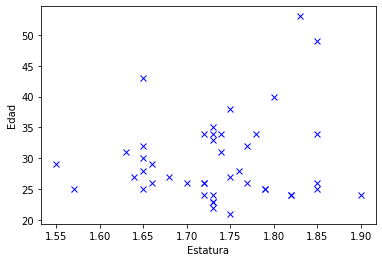

In [ ]:
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.plot(dataset["Estatura"],dataset["Edad"],'bx')
plt.show()

In [ ]:
dscv = pd.read_csv('cv.csv')
dscv.columns = ['Estatura', 'Edad']
dscv.head()
#Train = dscv
Train, Test = train_test_split(dscv,train_size=0.5, random_state=42)


In [ ]:
dsanomalias = pd.read_csv("anomalias.csv")
dsanomalias.columns = ['yhat']
dsanomalias.head()
Trainy = dsanomalias
#Trainy, Testy = train_test_split(dsanomalias,train_size=0.5, random_state=42)

In [ ]:
print(Trainy)

   yhat
0     1
1     1
2     1
3     1


In [ ]:
def probability(df):
    s = np.sum(df, axis=0)
    m = len(df)
    mu = s/m
    
    vr = np.sum((df - mu)**2, axis=0)
    variance = vr/m
    
    var_dia = np.diag(variance)

    k = len(mu)
    X = df - mu
    print(k)
    print(X)

    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(var_dia)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(var_dia) * X,axis=1))
    return p

def estimateGaussian(dataset):
  media = np.mean(dataset,axis=0)
  sigma = np.cov(dataset.T)
  return media,sigma

def multivariateGaussian(dataset,media,var):
  p = multivariate_normal(mean=media,cov=var)
  return p.pdf(dataset)

def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000
    epsilons = np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):

        predictions = (probs < epsilon) 
        print(predictions)
        f = f1_score(gt, predictions,average='binary')
        #print(f)
        #print('------')
        if f > best_f1:
            #print('----')
            best_f1 = f
            best_epsilon = epsilon
    
    return best_f1, best_epsilon
  




In [ ]:
media,sigma = estimateGaussian(dataset)
pdf = multivariateGaussian(dataset,media,sigma)
print(pdf)
print(media)
print(sigma)

[0.22856213 0.29869155 0.21861121 0.21786979 0.14733967 0.19213587
 0.14192005 0.08897114 0.07341122 0.12870825 0.19160514 0.17189088
 0.09981304 0.1473954  0.17189088 0.23900461 0.24884721 0.02943121
 0.17850658 0.27435819 0.26253168 0.07828903 0.06498756 0.09981304
 0.14387197 0.24575252 0.01682808 0.27682344 0.22981883 0.16428003
 0.26483066 0.01533041 0.2483547  0.2678488  0.00067169 0.16790953
 0.21850016 0.16440648 0.19160514 0.01710575 0.26483066 0.11274156
 0.22062902 0.00299751]
Estatura     1.733864
Edad        29.590909
dtype: float64
[[5.90332981e-03 7.69661734e-02]
 [7.69661734e-02 4.69915433e+01]]


In [ ]:
print(Train)

   Estatura  Edad
2      1.60    31
4      1.82    30
3      1.60    35
6      1.79    31


In [ ]:
p_cv = multivariateGaussian(Train,media,sigma)

fscore, ep = selectThresholdbyCV(p_cv,Trainy)
print(ep)

0.038380911170298355 0.23273779556377705 0.0001943568843934787
0.16218624652894623


In [ ]:
print (Testy)

   Estatura  Edad
1     175.1   2.5
3     150.0  14.0


In [78]:
outliers = np.asarray(np.where(pdf < ep))
print(outliers)
df = dataset.to_numpy()
df[outliers]

[[ 4  6  7  8  9 12 13 17 21 22 23 24 26 31 34 39 41 43]]


array([[[ 1.65, 32.  ],
        [ 1.64, 27.  ],
        [ 1.85, 34.  ],
        [ 1.85, 26.  ],
        [ 1.75, 21.  ],
        [ 1.82, 24.  ],
        [ 1.65, 25.  ],
        [ 1.57, 25.  ],
        [ 1.8 , 40.  ],
        [ 1.85, 25.  ],
        [ 1.82, 24.  ],
        [ 1.75, 38.  ],
        [ 1.55, 29.  ],
        [ 1.9 , 24.  ],
        [ 1.83, 53.  ],
        [ 1.65, 43.  ],
        [ 1.63, 31.  ],
        [ 1.85, 49.  ]]])

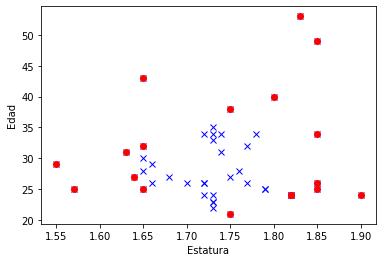

In [80]:
plt.figure()
plt.xlabel('Estatura')
plt.ylabel('Edad')
plt.plot(dataset["Estatura"],dataset["Edad"],'bx')
plt.plot(df[outliers,0],df[outliers,1],'ro')
plt.show()